# 1. Import necessary libraries

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For more attractive visualizations
from scipy import stats # For statistics
from sklearn.model_selection import train_test_split, GridSearchCV  # To split the dataset into train and test and for hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble models
from sklearn.tree import plot_tree # To visualize decision trees
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.preprocessing import OneHotEncoder # To encode categorical variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Evaluation metrics

Load the dataset to work with


In [2]:
data = pd.read_csv('../data/medical_cost.csv')

In [3]:
data.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


Analyze the data types we have in the dataset


In [4]:
data.dtypes

Id            int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## 2. Analysis of Numeric Variables


Perform a statistical analysis of the numeric data


In [5]:
data.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


Perform a histogram analysis of the numeric variables

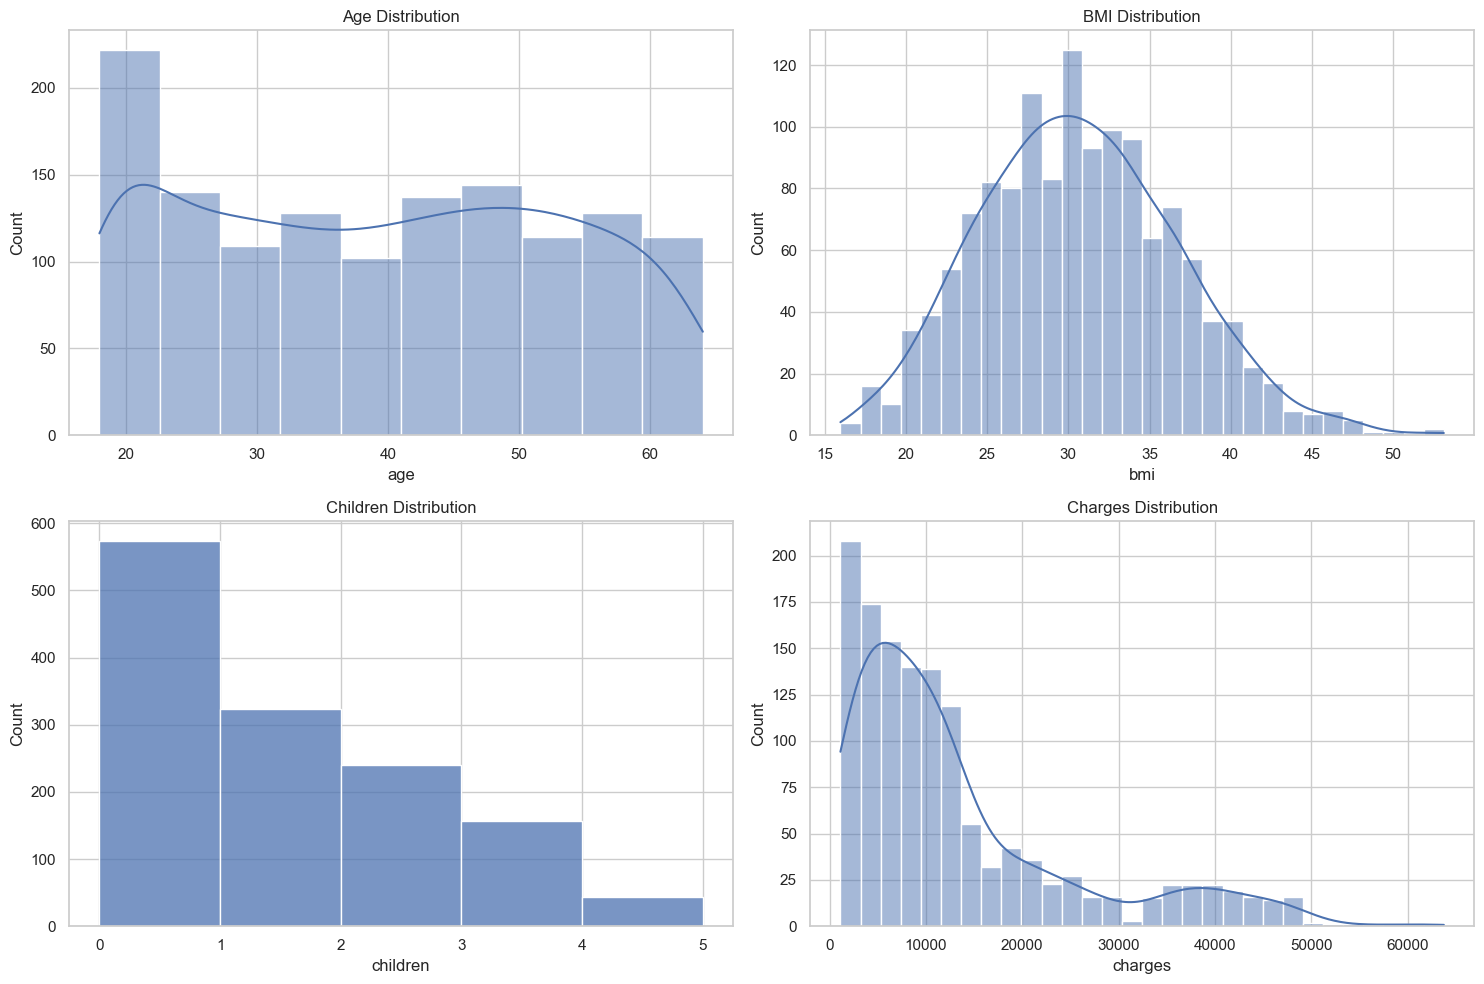

In [6]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create subplots for each numeric variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histogram of age
sns.histplot(data['age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Histogram of body mass index (BMI)
sns.histplot(data['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

# Histogram of number of children
sns.histplot(data['children'], bins=5, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution')

# Histogram of medical charges
sns.histplot(data['charges'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution')

# Adjust layout
plt.tight_layout()

# Show the histograms
plt.show()


Scatter plot analysis of numeric variables


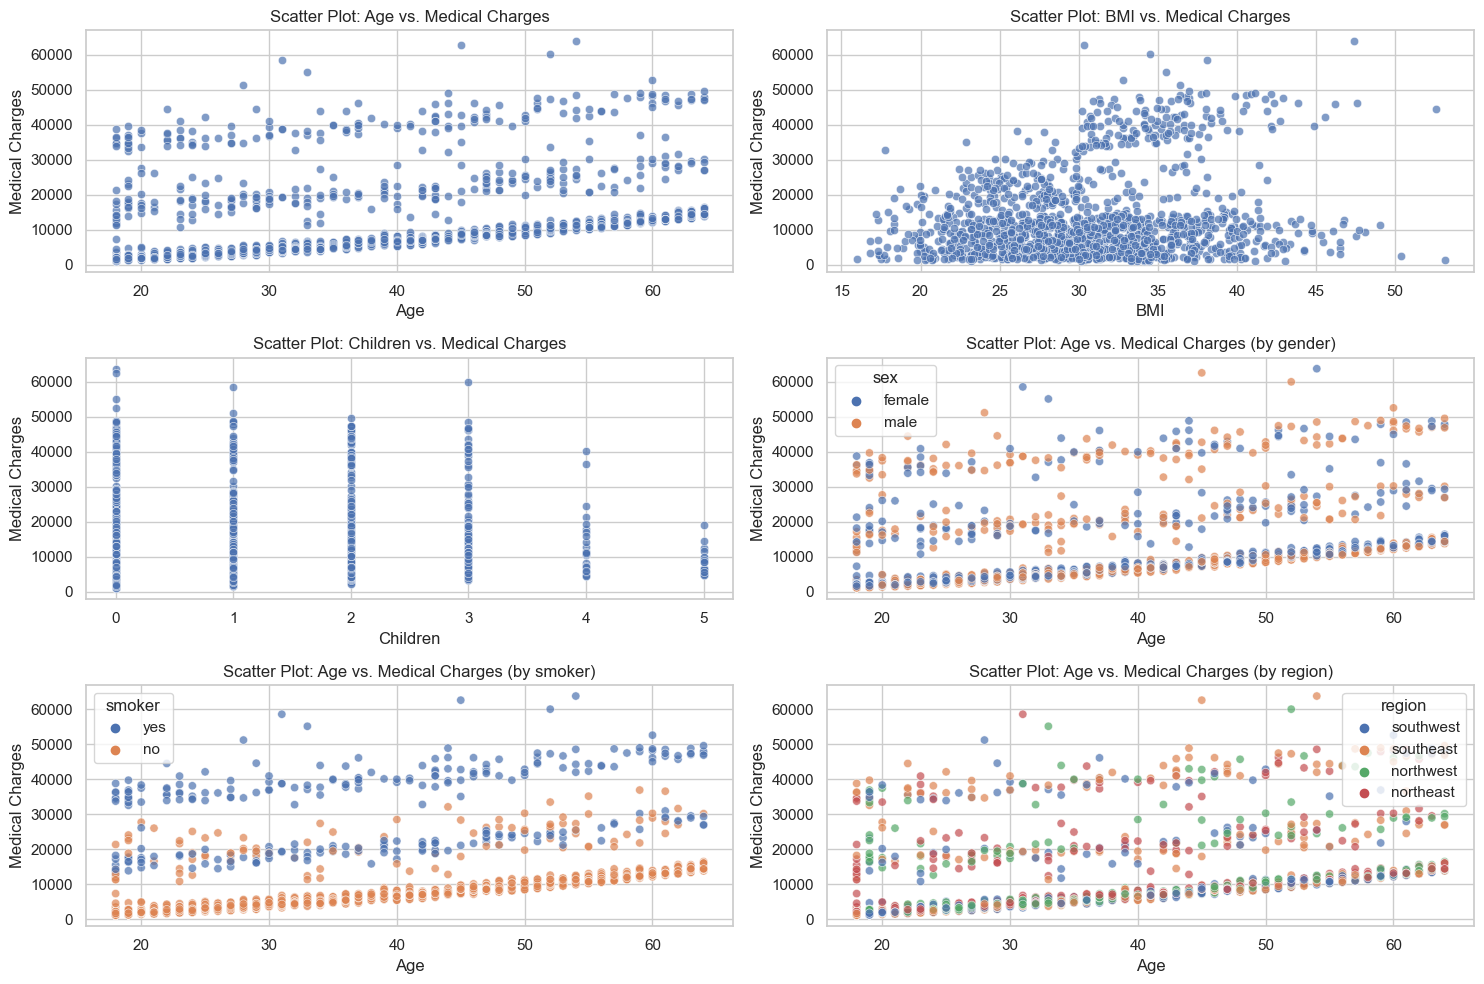

In [7]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create subplots for each numeric variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Scatter plots of age vs. charges
sns.scatterplot(x='age', y='charges', data=data, alpha=0.7, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot: Age vs. Medical Charges')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Medical Charges')

# Scatter plots of BMI vs. charges
sns.scatterplot(x='bmi', y='charges', data=data, alpha=0.7, ax=axes[0, 1])
axes[0, 1].set_title('Scatter Plot: BMI vs. Medical Charges')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Medical Charges')

# Scatter plots of children vs. charges
sns.scatterplot(x='children', y='charges', data=data, alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot: Children vs. Medical Charges')
axes[1, 0].set_xlabel('Children')
axes[1, 0].set_ylabel('Medical Charges')

# Scatter plots of age vs. charges by gender
sns.scatterplot(x='age', y='charges', hue='sex', data=data, alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot: Age vs. Medical Charges (by gender)')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Medical Charges')

# Scatter plots of age vs. charges by smoker
sns.scatterplot(x='age', y='charges', hue='smoker', data=data, alpha=0.7, ax=axes[2, 0])
axes[2, 0].set_title('Scatter Plot: Age vs. Medical Charges (by smoker)')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Medical Charges')

# Scatter plots of age vs. charges by region
sns.scatterplot(x='age', y='charges', hue='region', data=data, alpha=0.7, ax=axes[2, 1])
axes[2, 1].set_title('Scatter Plot: Age vs. Medical Charges (by region)')
axes[2, 1].set_xlabel('Age')
axes[2, 1].set_ylabel('Medical Charges')

# Adjust layout
plt.tight_layout()

# Show the scatter plots
plt.show()


In the scatter plots, it can be observed that the relationship between medical charges and age is linear.
Additionally, when adding the coloration for smoker status, it's evident that smokers have higher expenses than non-smokers.
Hence, it can be stated that age and smoking are influencing factors in medical expense costs.
However, this is not the case for age and gender, as well as age and region.
BMI does exhibit a linear relationship with medical expenses, but the same cannot be said for the number of children.
Regardless of the number of children, medical expenses appear to be similar.

Boxplot analysis of numeric variables to detect outliers


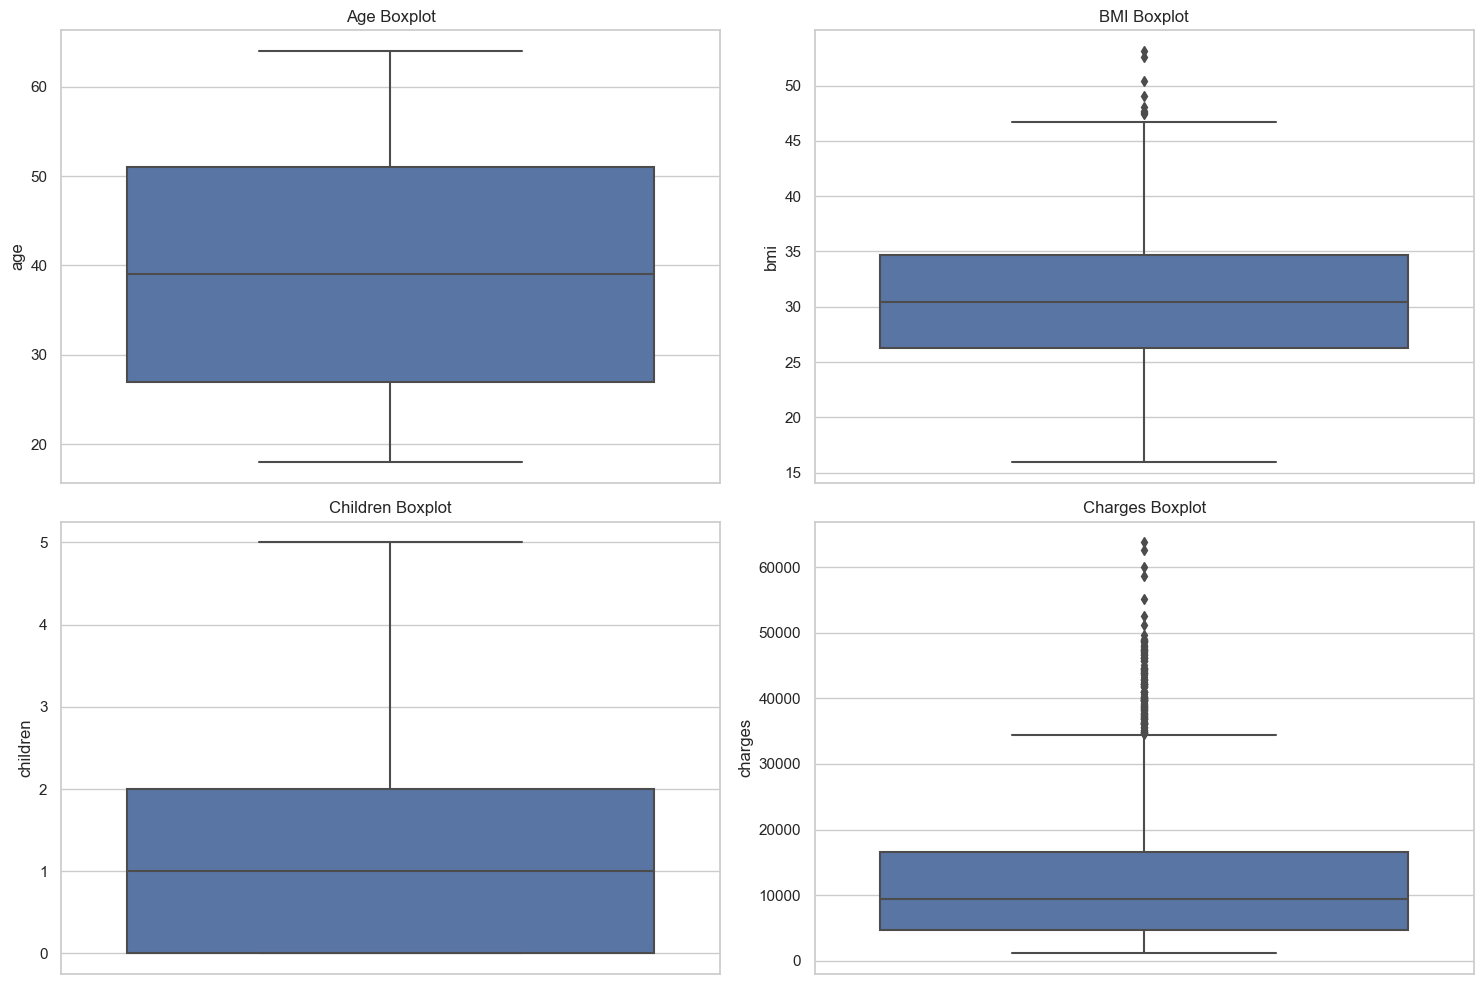

In [8]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create subplots for each numeric variable (boxplots)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot of age
sns.boxplot(y=data['age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Boxplot')

# Boxplot of body mass index (BMI)
sns.boxplot(y=data['bmi'], ax=axes[0, 1])
axes[0, 1].set_title('BMI Boxplot')

# Boxplot of number of children
sns.boxplot(y=data['children'], ax=axes[1, 0])
axes[1, 0].set_title('Children Boxplot')

# Boxplot of medical charges
sns.boxplot(y=data['charges'], ax=axes[1, 1])
axes[1, 1].set_title('Charges Boxplot')

# Adjust layout
plt.tight_layout()

# Show the boxplots
plt.show()


Outliers can be observed in the medical charges and BMI variables, so we will proceed to analyze them in detail.


Calculate outliers for the medical charges and BMI variables using the 1.5 IQR rule


In [9]:
# Calculate Q1, Q3, and IQR for 'charges'
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the limits to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = len(data[(data['charges'] < lower_bound) | (data['charges'] > upper_bound)])

print("Number of outliers in 'charges':", outliers_count)


Number of outliers in 'charges': 139


In [10]:
# Calculate Q1, Q3, and IQR for 'BMI'
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the limits to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = len(data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)])

print("Number of outliers in 'BMI':", outliers_count)

Number of outliers in 'BMI': 9


After completing the outliers analysis, it can be observed that there are 9 outliers in the BMI variable and 139 in the medical charges variable.
Since these numbers are not significant and considering that they represent real data, we will proceed not to remove them.

## 3. Analysis of Categorical Variables


Create bar charts to analyze the categorical variables


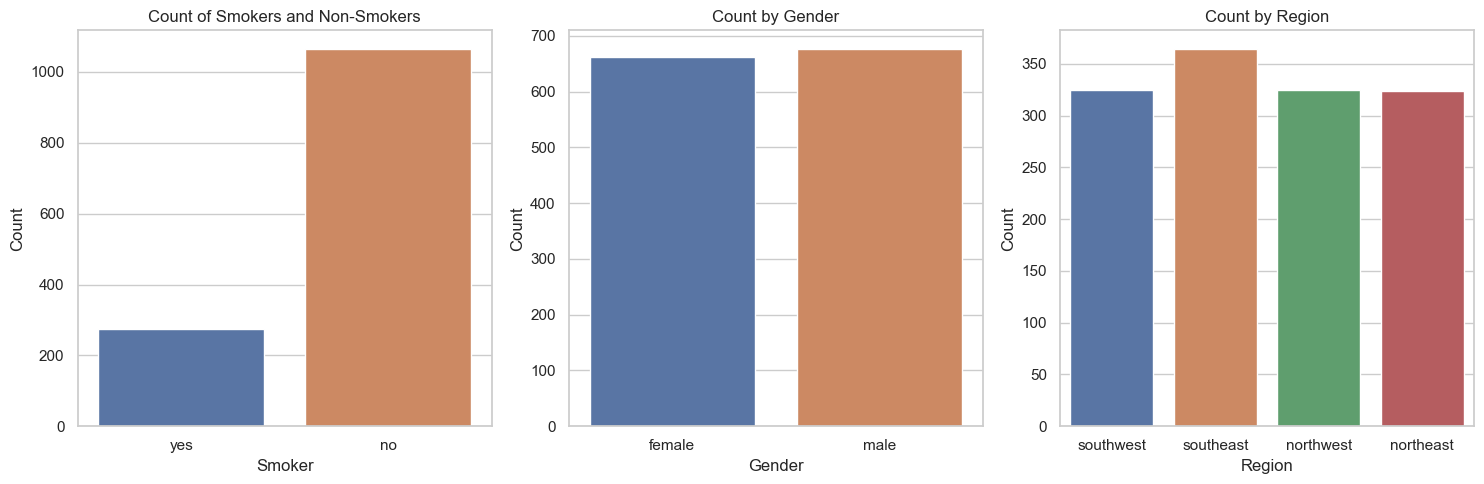

In [11]:
# Create a figure with 3 plots in a row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Bar plot for the 'smoker' variable
sns.countplot(x='smoker', data=data, ax=axes[0])
axes[0].set_title('Count of Smokers and Non-Smokers')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Count')

# Bar plot for the 'sex' variable
sns.countplot(x='sex', data=data, ax=axes[1])
axes[1].set_title('Count by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Bar plot for the 'region' variable
sns.countplot(x='region', data=data, ax=axes[2])
axes[2].set_title('Count by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()


## 4. Correlation Analysis

After completing the variable analysis, let's perform a correlation analysis among the numeric variables.
To do this, we first need to transform the categorical variables into numeric using the OneHotEncoder function from sklearn.


In [12]:
# Create a copy of the DataFrame to avoid modifying the original
data_encoded = data.copy()

# List of categorical variables to be encoded
categorical_cols = ['smoker', 'sex', 'region']

# Create the OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply One-Hot Encoding and add the new columns to the DataFrame
encoded_features = encoder.fit_transform(data_encoded[categorical_cols])

# Get the names of the new columns
encoded_cols = []
for i, col in enumerate(categorical_cols):
    unique_values = data_encoded[col].unique()
    for value in unique_values[1:]: 
        encoded_cols.append(f'{col}_{value}')

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_features, columns=encoded_cols)

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

# Drop the original categorical columns
data_encoded.drop(categorical_cols, axis=1, inplace=True)

# Show the first few rows of the encoded DataFrame
data_encoded.head()

,Id,age,bmi,children,charges,smoker_no,sex_male,region_southeast,region_northwest,region_northeast
0,1,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,1.0
1,2,18,33.770,1,1725.55230,0.0,1.0,0.0,1.0,0.0
2,3,28,33.000,3,4449.46200,0.0,1.0,0.0,1.0,0.0
3,4,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0
4,5,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0


Once the categorical variables are transformed, let's perform a correlation analysis among the numeric variables.


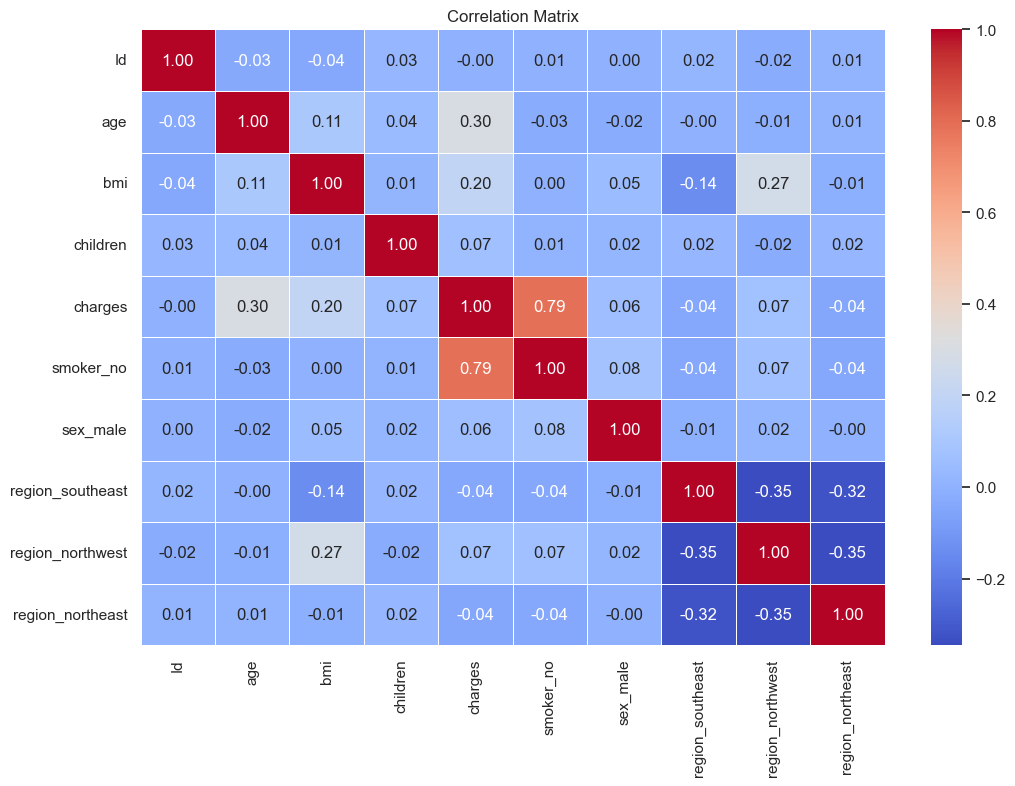

In [13]:
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that the variables with the highest correlation with medical charges are BMI, smoking status, and age.
Therefore, it can be stated that these variables have the most significant influence on the cost of medical expenses.

## 5. Data Preparation


In [14]:
# Create X and y excluding the unwanted columns
X = data_encoded.drop(['charges', 'region_southeast', 'region_northwest', 'region_northeast', 'Id', 'children', 'sex_male'], axis=1)
y = data_encoded['charges']

# Check the first few rows of X and y to confirm
print("X:")
print(X.head())
print("\ny:")
print(y.head())


X:
   age     bmi  smoker_no
0   19  27.900        1.0
1   18  33.770        0.0
2   28  33.000        0.0
3   33  22.705        0.0
4   32  28.880        0.0

y:
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Now that we have only the variables of interest, let's proceed to split the data into training and testing sets using the train_test_split function from sklearn.


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1070, 3)
Shape of X_test: (268, 3)
Shape of y_train: (1070,)
Shape of y_test: (268,)


Note: On this occasion, it has been decided not to scale the data, as the models we will use do not require it.

## 6. Model Training


This time, we will use 3 regression models, which are:
LinearRegression, RandomForestRegressor, GradientBoostingRegressor.

The idea is to train a list of models to compare and determine which one best fits the data.


In [16]:
# Create a list of models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Iterate over the models
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Show the results
    print(f'Model: {model_name}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R2 Score: {r2}')
    print('\n')


Model: Linear Regression
Mean Squared Error (MSE): 34512843.8802279
R2 Score: 0.7776932310583374


Model: Random Forest
Mean Squared Error (MSE): 25668135.254829608
R2 Score: 0.8346644445453022


Model: Gradient Boosting
Mean Squared Error (MSE): 20048736.238795534
R2 Score: 0.8708605471610059




As expected, LinearRegression is the least suitable for the data, so it will be discarded for the analysis.


We proceed to perform hyperparameter tuning for the RandomForestRegressor and GradientBoostingRegressor models using GridSearchCV function from sklearn.


In [17]:
# Define the hyperparameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Models and their respective hyperparameter grids
models_with_params = [
    ('Random Forest', RandomForestRegressor(random_state=42), param_grid_rf),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42), param_grid_gb)
]

# Iterate over the models and perform grid search
for model_name, model, param_grid in models_with_params:
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Best model with the best hyperparameters
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Show results
    print(f'Model: {model_name}')
    print(f'Best hyperparameters: {grid_search.best_params_}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R2 Score: {r2}')
    print('\n')


Model: Random Forest
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error (MSE): 21184874.36535138
R2 Score: 0.8635423673882067


Model: Gradient Boosting
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error (MSE): 19841789.802642602
R2 Score: 0.8721935463692081




Having found the best hyperparameters, we proceed to train the selected model, which in this case is GradientBoostingRegressor.


Mean Squared Error (MSE): 19841789.802642602
R2 Score: 0.8721935463692081
Mean Absolute Error: 2540.5802658495127


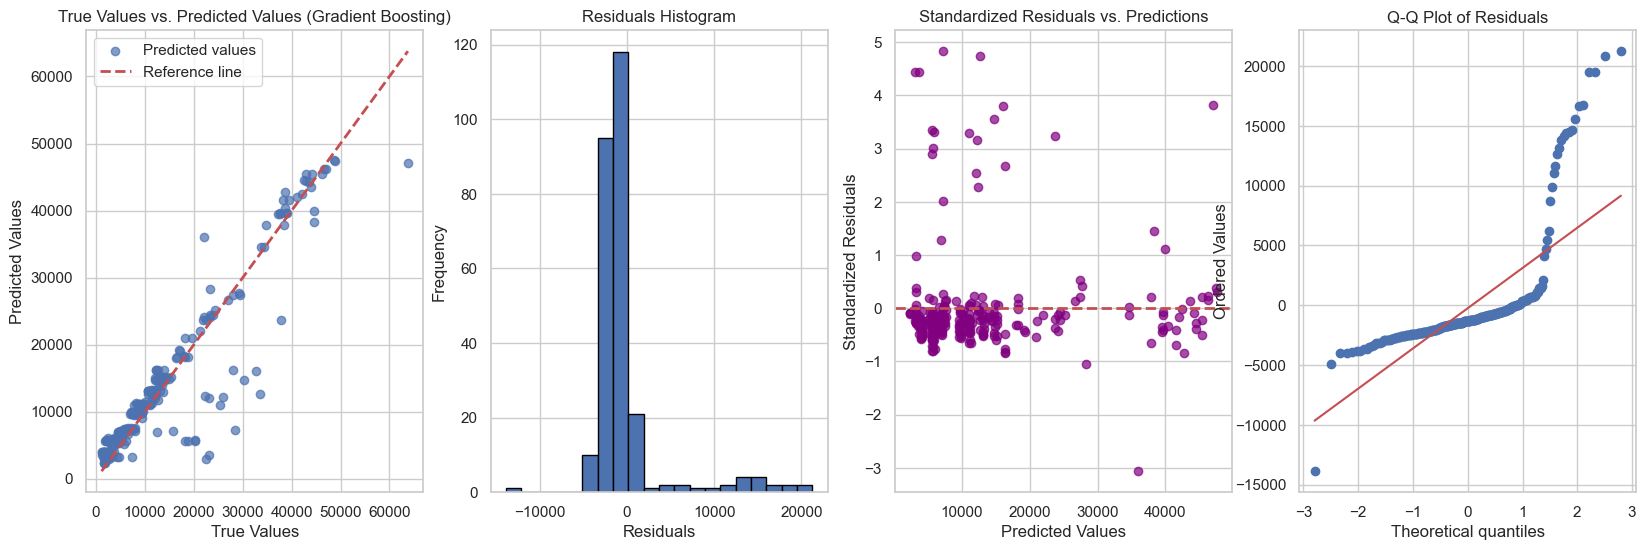

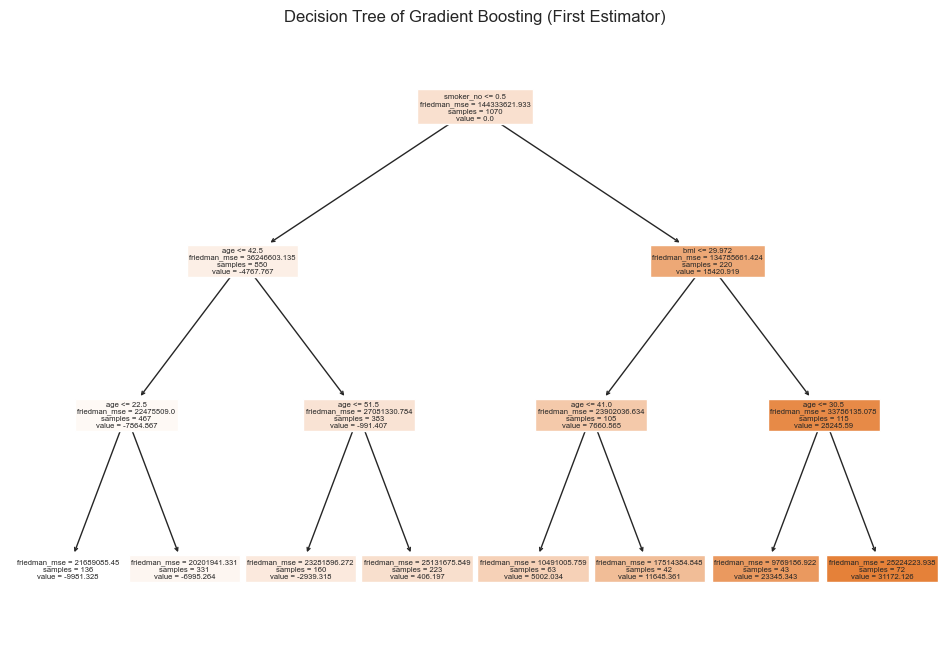

In [18]:
# Train the Gradient Boosting model with the best hyperparameters
best_gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50, random_state=42)
best_gb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = best_gb_model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred_gb

# Calculate standardized residuals
residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)

# Get the relevant features for the tree from X_train
relevant_features = X_train.columns

# Convert relevant_features to a list of feature names
relevant_features_list = list(relevant_features)

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Plot of true values vs. predicted values (Gradient Boosting)
plt.figure(figsize=(20, 6))

# Plot 1: True values vs. Predicted values
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_gb, alpha=0.7, c='b', label='Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2, label='Reference line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values (Gradient Boosting)')
plt.legend()

# Plot 2: Residuals Histogram
plt.subplot(1, 4, 2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')

# Plot 3: Standardized Residuals vs. Predictions
plt.subplot(1, 4, 3)
plt.scatter(y_pred_gb, residuals_standardized, alpha=0.7, c='purple')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs. Predictions')

# Plot 4: Q-Q Plot of Residuals
plt.subplot(1, 4, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# Show the decision tree of the first estimator of Gradient Boosting
plt.figure(figsize=(12, 8))
plot_tree(best_gb_model.estimators_[0][0], filled=True, feature_names=relevant_features_list)
plt.title('Decision Tree of Gradient Boosting (First Estimator)')
plt.show()
